In [1]:
import os
import matplotlib
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import sys


In [2]:
#Local Path to working dir
PYLOCAL = '/u/phg/adas/atomdatpy' 
os.chdir(PYLOCAL)
# path to modules
sys.path.append('/u/phg/adas')
os.getcwd()

'/raven/u/phg/adas/atomdatpy'

In [6]:
import atomdat.adas.adf11 as adf11; reload(adf11)
fb = '/raven/u/phg/adas/adf11/'
pltC = adf11.ADF11(); prbC = adf11.ADF11()
pltH = adf11.ADF11(); prbH = adf11.ADF11()
fn = 'plt96/plt96_c.dat'
_ = pltC.read(fn,fb)
fn = 'prb96/prb96_c.dat'
_ = prbC.read(fn,fb)
fn = 'plt96/plt96_h.dat'
_ = pltH.read(fn,fb)
fn = 'prb96/prb96_h.dat'
_ = prbH.read(fn,fb)

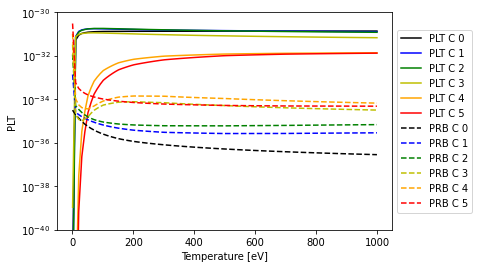

In [14]:
import numpy as np
fig = plt.figure(); ax = plt.gca()
ylim = [1E-40,1.E-30]
lcol = ['k','b','g','y','orange','r','violet','brown','gray']

nt = 100
tel = np.linspace(0.3,1000.,nt)

ne = 10.E19
nel = np.ones(nt)*ne

item = pltC
for i in range(item.dat.nz):
    ax.plot(tel,item.interpolate(nel,tel,i), label=f"PLT C {i}", c=lcol[i])

item = prbC
for i in range(item.dat.nz):
    ax.plot(tel,item.interpolate(nel,tel,i), label=f"PRB C {i}", c=lcol[i], ls="--")
    
    
ax.set_ylabel('PLT')  # '/TB [#/s]')
ax.set_yscale('log')
ax.set_ylim(ylim)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Temperature [eV]')
plt.show(block=False)

In [21]:
import numpy as np
fig = plt.figure(); ax = plt.gca()
lcol = ['k','b','g','y','orange','r','violet','brown','gray']

nt = 100
tel = np.linspace(0.3,1000.,nt)

ne = 10.E19
nel = np.ones(nt)*ne

for i in range(pltC.dat.nz):
    yval = pltC.interpolate(nel,tel,i) / prbC.interpolate(nel,tel,i)
    ax.plot(tel, yval, label=f"PLT/PRB C {i}", c=lcol[i])

    
    
ax.set_ylabel('PLT')  # '/TB [#/s]')
ax.set_yscale('log')
ax.set_ylim([1E-5,1.E6])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Temperature [eV]')
plt.show(block=False)

<IPython.core.display.Javascript object>


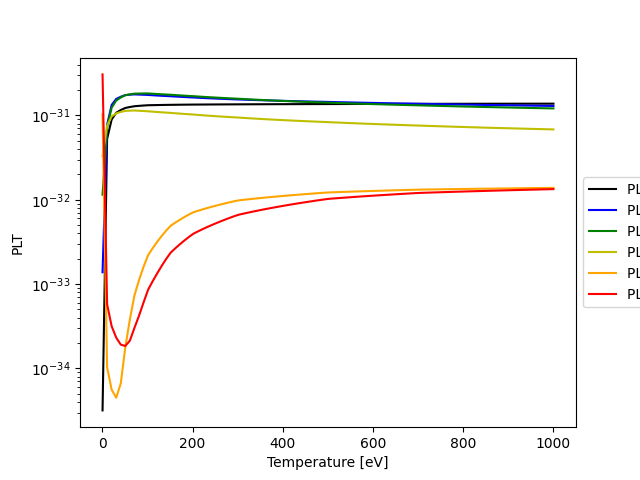

In [26]:
import numpy as np
fig = plt.figure(); ax = plt.gca()
lcol = ['k','b','g','y','orange','r','violet','brown','gray']

nt = 100
tel = np.linspace(0.3,1000.,nt)

ne = 10.E19
nel = np.ones(nt)*ne

for i in range(pltC.dat.nz):
    yval = pltC.interpolate(nel,tel,i) + prbC.interpolate(nel,tel,i)
    ax.plot(tel, yval, label=f"PLT + PRB C {i}", c=lcol[i])

    
    
ax.set_ylabel('PLT')  # '/TB [#/s]')
ax.set_yscale('log')
#ax.set_ylim([1E-5,1.E6])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Temperature [eV]')
plt.show(block=False)

In [31]:
%matplotlib notebook
fig = plt.figure(); ax = plt.gca()
lcol = ['k','b','g','y','orange','r','violet','brown','gray']

nt = 100
tel = np.linspace(0.3,1000.,nt)

ne = 10.E19
nel = np.ones(nt)*ne

for i in range(pltC.dat.nz):
    yval = pltC.interpolate(nel,tel,i) + prbC.interpolate(nel,tel,i)
    ax.plot(tel, yval, label=f"PLT + PRB C {i}", c=lcol[i])

for i in range(pltH.dat.nz):
    yval = pltH.interpolate(nel,tel,i) + prbH.interpolate(nel,tel,i)
    ax.plot(tel, yval, label=f"PLT + PRB H {i}", c=lcol[i], ls="--", lw=3)
    
    
ax.set_ylabel('PLT + PRB')  # '/TB [#/s]')
ax.set_yscale('log')
ax.set_ylim([1E-35,1.E-30])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Temperature [eV]')
fig.tight_layout()
plt.show(block=False)

<IPython.core.display.Javascript object>